In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from oscovida.regions import Region
import oscovida.statistics as statistics

In [3]:
import oscovida.original.statistics

In [21]:
region = Region('DEU')
region.data

,id,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
date,,,,,,,,,,,,,,,,,,,,,
2020-01-04,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-05,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-06,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-07,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-01-08,DEU,0,0,0,0,0,0,0,82905782,0,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-03,DEU,8586648,211684,195843,9180,0,0,0,82905782,1,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-04,DEU,8586648,212597,195868,9181,0,0,0,82905782,1,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE
2020-08-05,DEU,8586648,213545,195887,9181,0,0,0,82905782,1,...,EUR,1,Germany,NaN,NaN,51.0,9.0,NaN,Germany,DE


# `statistics.daily`

In [22]:
data = region.data.confirmed

In [23]:
(
    (daily_original, _),
    (daily_original_sw, _),
    (daily_original_ss, _),
) = oscovida.original.statistics.compute_daily_change(data)


In [24]:
daily_refactor = data.pipe(statistics.daily)
all(daily_refactor.to_numpy() == daily_original.to_numpy()) #  TODO: Refactor has additional element at start for some reason?

True

In [25]:
daily_refactor_sw = data.pipe(statistics.daily).pipe(statistics.smooth)
all(daily_refactor_sw.to_numpy() == daily_original_sw.to_numpy())

True

In [37]:
daily_refactor_ss = data.pipe(statistics.daily).pipe(statistics.smooth, kind='strong')
all(daily_refactor_ss.to_numpy() == daily_original_ss.to_numpy())

True

# `statistics.doubling_time`

In [48]:
(
    (dtime_original, _),
    (dtime_original_s, _)
) = oscovida.original.statistics.compute_doubling_time(data)

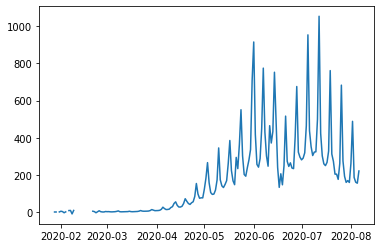

In [66]:
dtime_refactor = data.pipe(statistics.doubling_time)
# plt.plot()
plt.plot(dtime_original )

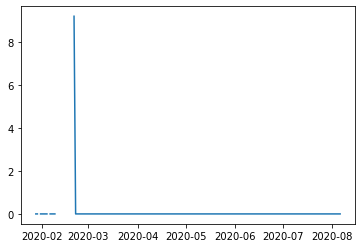

In [83]:
plt.plot(dtime_original - dtime_refactor.replace([np.inf, -np.inf], np.nan).dropna())

In [65]:
np.roll(data.to_numpy(), 1)

array([214214,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            1,      2,      4,      4,      7,      8,     10,      8,
           12,     12,     13,     14,     13,     14,     14,     16,
           18,     16,     16,     16,     16,     16,     16,     16,
           19,     16,     20,     16,     21,     23,     30,     53,
          100,    122,    158,    199,    284,    438,    622,    808,
          949,   1050,   1397,   1997,   2754,   3746,   5192,   6495,
         7474,   9522,  12566,  16178,  20257,  24307,  27665,  29932,
        33659,  38547,  44238,  50153,  56149,  60887,  63975,  68100,
        74161,  80440,  87002,  93187,  97526, 100080, 103754, 108955,
       114237, 119152, 122503, 125396, 127263, 128860, 131325, 134649,
       138065, 141112, 143221, 144599, 146320, 148513, 151007, 153089,
      

In [63]:
data.shift()

date
2020-01-04         NaN
2020-01-05         0.0
2020-01-06         0.0
2020-01-07         0.0
2020-01-08         0.0
                ...   
2020-08-03    210900.0
2020-08-04    211684.0
2020-08-05    212597.0
2020-08-06    213545.0
2020-08-07    214214.0
Name: confirmed, Length: 217, dtype: float64